The Book Crossing dataset was collected by Cai-Nicolas Ziegler. It contains around 1.14 Million implicit/Explicit ratings of 270K books by 95K users. The dataset mainly consists of three tables namely BX-Books, BX-Users and BX-Book-Ratings.
The BX_Books table has information of book title along with author information for each ISBN. Additionally, it contains book image URL information. The BX-Users table contains demographic information of book users. The BX-Book-Ratings table consists of user rating information along with User ID and ISBN to identify each book and its respective user.

In [1]:
#Data Load:
#In order to avoid errors due to latin characters and bad records, the following functions were used while loading CSV files in to python.

import pandas as pd
import numpy as np
from matplotlib import pyplot

books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['User_ID', 'ISBN', 'Book_Rating']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['User_ID', 'Location', 'Age']


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\ssumi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [2]:
#Books data: We will explore the sample data from the books table.
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
#We will check the datatype for any data inaccuracy
print(books.shape)
books.dtypes

(271360, 8)


ISBN                   object
Book_Title             object
Book_Author            object
Year_Of_Publication    object
Publisher              object
Image_URL_S            object
Image_URL_M            object
Image_URL_L            object
dtype: object

In [4]:
print(books.Year_Of_Publication.unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

It appears year_of_publication is having strings (DK Publishing,Gallimard) for some records due to loading issues. 
Additionally, there are many records with year of publication beyond 2004 which is incorrect as the data was compiled in 2004.

In [5]:
#Firstly, we will identify records with strings in Year of publication and make necessary updates
books.loc[books.Year_Of_Publication=='DK Publishing Inc']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [6]:
books.iloc[221678,7]='http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'
books.iloc[221678,6]='http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.iloc[221678,5]='http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.iloc[221678,4]='DK Publishing Inc'
books.iloc[221678,3]=2000
books.iloc[221678,2]='James Buckley'
books.iloc[221678,1]='DK Readers: How Comic Books Come to Life (Level 4: Proficient Readers)'
books.iloc[221678,:]

ISBN                                                          0789466953
Book_Title             DK Readers: How Comic Books Come to Life (Leve...
Book_Author                                                James Buckley
Year_Of_Publication                                                 2000
Publisher                                              DK Publishing Inc
Image_URL_S            http://images.amazon.com/images/P/0789466953.0...
Image_URL_M            http://images.amazon.com/images/P/0789466953.0...
Image_URL_L            http://images.amazon.com/images/P/0789466953.0...
Name: 221678, dtype: object

In [7]:
books.iloc[209538,7]='http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'
books.iloc[209538,6]='http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.iloc[209538,5]='http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.iloc[209538,4]='DK Publishing Inc'
books.iloc[209538,3]=2000
books.iloc[209538,2]='Michael Teitelbaum'
books.iloc[209538,1]='DK Readers: Creating the X-Men:How It All Began (Level 4: Proficient Readers)'
books.iloc[209538,:]

ISBN                                                          078946697X
Book_Title             DK Readers: Creating the X-Men:How It All Bega...
Book_Author                                           Michael Teitelbaum
Year_Of_Publication                                                 2000
Publisher                                              DK Publishing Inc
Image_URL_S            http://images.amazon.com/images/P/078946697X.0...
Image_URL_M            http://images.amazon.com/images/P/078946697X.0...
Image_URL_L            http://images.amazon.com/images/P/078946697X.0...
Name: 209538, dtype: object

In [8]:
books.loc[books.Year_Of_Publication=='Gallimard']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [9]:
books.iloc[220731,7]='http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'
books.iloc[220731,6]='http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.iloc[220731,5]='http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.iloc[220731,4]='Gallimard'
books.iloc[220731,3]=2003
books.iloc[220731,2]='Jean-Marie Gustave Le ClÃ'
books.iloc[220731,1]="Peuple du ciel, suivi de 'Les Bergers'Â©zio"
books.iloc[220731,:]

ISBN                                                          2070426769
Book_Title                   Peuple du ciel, suivi de 'Les Bergers'Â©zio
Book_Author                                    Jean-Marie Gustave Le ClÃ
Year_Of_Publication                                                 2003
Publisher                                                      Gallimard
Image_URL_S            http://images.amazon.com/images/P/2070426769.0...
Image_URL_M            http://images.amazon.com/images/P/2070426769.0...
Image_URL_L            http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object

In [10]:
books.Year_Of_Publication=pd.to_numeric(books.Year_Of_Publication,errors='coerce')
books.dtypes

ISBN                   object
Book_Title             object
Book_Author            object
Year_Of_Publication     int64
Publisher              object
Image_URL_S            object
Image_URL_M            object
Image_URL_L            object
dtype: object

In [11]:
#We will now replace years beyond 2004 to NAN along with records having zero years. Once the incorrect the years are replaced, we will then take mean of publication years to replace NAN.
books.loc[(books.Year_Of_Publication>2004),'Year_Of_Publication']=np.NAN
books.loc[(books.Year_Of_Publication==0),'Year_Of_Publication']=np.NAN
books.Year_Of_Publication.fillna(round(books.Year_Of_Publication.mean()),inplace=True)

In [12]:
#The year of publication is now converted to an integer as shown below,
books.Year_Of_Publication=books.Year_Of_Publication.astype(int)
books['Year_Of_Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948, 1943,
       1947, 1945, 1923, 1939, 1926, 1938, 1911, 1904, 1949, 1932, 1928,
       1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902, 1924, 1921, 1900,
       1944, 1917, 1901, 1908, 1906, 1935, 1806, 1909, 1378, 1919, 1922,
       1897, 1376], dtype=int64)

In [13]:
books.dtypes

ISBN                   object
Book_Title             object
Book_Author            object
Year_Of_Publication     int32
Publisher              object
Image_URL_S            object
Image_URL_M            object
Image_URL_L            object
dtype: object

The image URLs from the books table are not required for the analysis. We will drop the same from the table so that we have only those columns which are having significance importance.

In [14]:
books.drop(columns=['Image_URL_S', 'Image_URL_M', 'Image_URL_L'], inplace=True)

In [15]:
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [16]:
#Users data: First, we will explore the sample data from the user table.
users.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


The location column appears to be capturing City, State and Country information of the user. 
We will split the location column by City, State and Country and add the new columns to the user dataset for future analysis.

In [17]:
users[['City','State/Province','Country']]=users.Location.str.split(",",n=2,expand=True)
users.head()

,User_ID,Location,Age,City,State/Province,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [18]:
Users_Age=sorted(users.Age.unique())
print(Users_Age)

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

The User table doesn't include age information for all the Users. Additionally, the Age column has some values which are beyond 100 years.

In order to capture the right tech-savvy population, we will concentrate on users having age between 5 and  80 years. We will approximate any age below 5 years to 5 years and, similarly, we will approximate age above 80 years to 80 years old. For any missing age, we will use the mean age of the population.

In [19]:
users.loc[users.Age>80]=80
users.loc[users.Age<5]=5
users.Age=users.Age.fillna(users.Age.mean())
Users_Age=sorted(users.Age.unique())
print(Users_Age)

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.680670569198554, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0]


In [20]:
#As we see the mean age of the population is in decimals. The datatype of column Age shall be changed to integer. 
users.Age=users.Age.astype(int)
Users_Age=sorted(users.Age.unique())
print(Users_Age)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [21]:
#Users ratings data: First, we will explore the sample data from the ratings table.
print(ratings.shape)
ratings.head()

(1149780, 3)


,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
print(sorted(ratings.Book_Rating.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


There are around 1.14M ratings from the users. 
We will check whether ratings table was able to capture user ratings for all the books from the books table

In [23]:
ratings_check_book=ratings[ratings.ISBN.isin(books.ISBN)]
ratings_check_user=ratings[ratings.User_ID.isin(users.User_ID)]
print(f'Ratings related to data in book table: {len(ratings_check_book)}')
print(f'Ratings related to data in user table: {len(ratings_check_user)}')

Ratings related to data in book table: 1031136
Ratings related to data in user table: 1142322


It’s clear that the ratings table includes ratings for books which are not part of books table. 
We will create a new ratings table to capture only those books and users which are part of other tables.

In [24]:
new_ratings=ratings_check_book
print(new_ratings.shape)
new_ratings.head()

(1031136, 3)


,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Now, the users who recorded explicit ratings(1–10) and implicit ratings (0) will be divided to perform analysis depending on the type of ratings.

In [25]:
explicit_ratings=new_ratings[new_ratings.Book_Rating!=0]
implicit_ratings=new_ratings[new_ratings.Book_Rating==0]
user_explicit=users[users.User_ID.isin(explicit_ratings.User_ID)]
user_implicit=users[users.User_ID.isin(implicit_ratings.User_ID)]

In [26]:
user_explicit.head()

,User_ID,Location,Age,City,State/Province,Country
7,8,"timmins, ontario, canada",34,timmins,ontario,canada
8,9,"germantown, tennessee, usa",34,germantown,tennessee,usa
11,12,"fort bragg, california, usa",34,fort bragg,california,usa
13,14,"mediapolis, iowa, usa",34,mediapolis,iowa,usa
15,16,"albuquerque, new mexico, usa",34,albuquerque,new mexico,usa


In [27]:
user_implicit.head()

,User_ID,Location,Age,City,State/Province,Country
1,2,"stockton, california, usa",18,stockton,california,usa
7,8,"timmins, ontario, canada",34,timmins,ontario,canada
8,9,"germantown, tennessee, usa",34,germantown,tennessee,usa
9,10,"albacete, wisconsin, spain",26,albacete,wisconsin,spain
13,14,"mediapolis, iowa, usa",34,mediapolis,iowa,usa


# Data Visualization

This is the initial stage of data processing which will help us to capture more insights from the data for further analysis. In this process, We will perform graphical analysis of the data to capture interesting trends. 

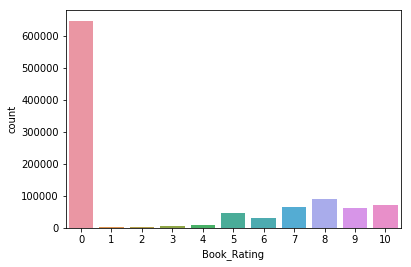

In [28]:
#Firstly, we will analyze how the ratings are distributed across all the books.
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(new_ratings.Book_Rating)
plt.show()

From the countplot, its clear that the implicit and explicit have unequal representation in the ratings table with books having around 700k implicit ratings recorded out of 1.14M ratings.

Now we will analyze how the books are explicitly rated using the countplot.

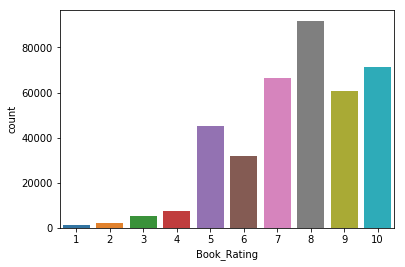

(383842, 3)

In [29]:
sns.countplot(explicit_ratings.Book_Rating)
plt.show()
explicit_ratings.shape

From the plot, it appears more than 100K book ratings were having rating of 8. Additionally, majority of books which were rated explicitly were having rating of 7 and above which suggests most of the books were well rated.

From the user data, we have information of around 95K users but the ratings table appears to capture around 1.14M ratings which suggest the same users have rated multiple books. We will now analyze how many ratings were recorded from each user.

We will now be concentrating only on explicit rating of users for the recommendation model.


In [30]:
top_users = explicit_ratings.groupby('User_ID')['Book_Rating'].count().sort_values(ascending=False)
print(f'Number of ratings from top 10 users are :\n{top_users[:10]}')
top_users.shape

Number of ratings from top 10 users are :
User_ID
11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
Name: Book_Rating, dtype: int64


(68091,)

Its quite shocking that some of the users have rated more than thousands of book, infact, the top user has rated 8524 books which is almost 1.5 the number of books rated by the second top user.

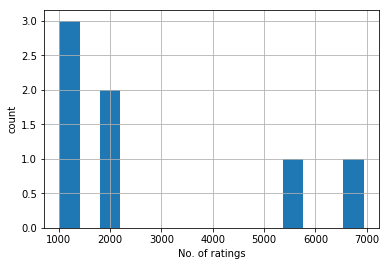

In [31]:
#Let now analyze users with more than 1000 ratings to check the distribution of number of explicit ratings per user.

ratings_per_user_1000 = top_users.where(top_users>1000)
ratings_per_user_1000.hist(bins=15)
plt.xlabel('No. of ratings')
plt.ylabel('count')
plt.show()

We have a good number of users who have rated more than 1000 books. Now, We will plot the histogram to check the number of users with ratings of less than 10. The general assumption is majority of users have rated less than 10 books and hence contribute major chunk of the ratings. 

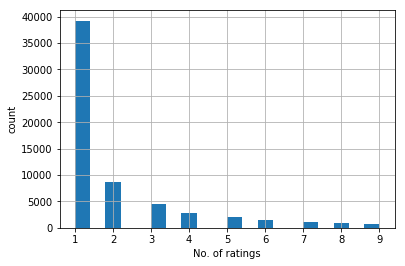

In [32]:
ratings_per_user_10 = top_users.where(top_users<10)
ratings_per_user_10.hist(bins=20)
plt.xlabel('No. of ratings')
plt.ylabel('count')
plt.show()

It appears out of 77K explicit ratings, majority of the user have rated the book once/twice. From the plot, its clear that top users with thousands of ratings actually form outlier for the dataset. We will restrict the data to less than thousand ratings per user as part of the analysis.

User Ratings are something which depends entirely on individuality. People have different take on what values to input if its an average book, some users generously rate around 8 even for average book where as other users have a tendency to rate poorly such as a rating of 4 even if its average. This discrepancy has an huge effect how we need to model recommendation system. For now, we will analyze the mean user ratings to get insights on how the mean user ratings are distributed.


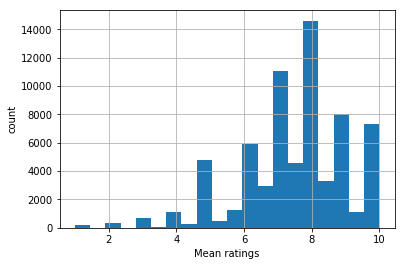

In [33]:
mean_user_ratings = explicit_ratings.groupby('User_ID')['Book_Rating'].mean()
mean_user_ratings.hist(bins=20)
plt.xlabel('Mean ratings')
plt.ylabel('count')
plt.show()

From the plot, its clear that the majority of the users generously rated the books with majority of ratings falling between 6 and 10.

Now we will analyze the average book ratings to check if there is any abnormality on how it is rated.


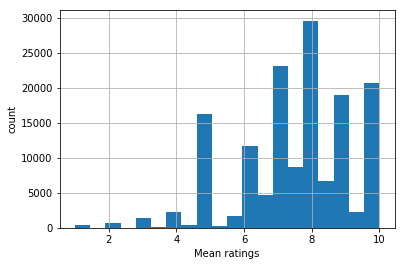

In [34]:
mean_book_ratings = explicit_ratings.groupby('ISBN')['Book_Rating'].mean()
mean_book_ratings.hist(bins=20)
plt.xlabel('Mean ratings')
plt.ylabel('count')
plt.show()

We dont see any oddity in the mean ratings of books. The mean book ratings follow similar pattern to the mean user ratings with majority of the ratings falling in between 6 and 10.

Finally, we will analyze the age distribution of users involved in rating the books just to make sure there was no cascading effect when we altered the users age below 5 to 5 years and age above 80 to 80 years old.

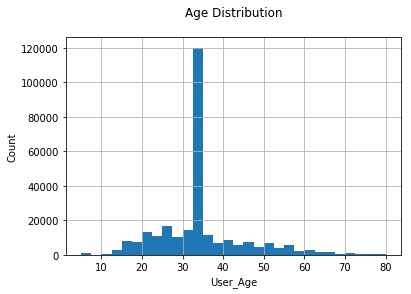

(278858, 6)

In [35]:
users.Age.hist(bins=30)
plt.title('Age Distribution\n')
plt.xlabel('User_Age')
plt.ylabel('Count')
plt.show()
users.shape

Its clear that setting a maximum and minimum age to the certain abnormal records had no significant effect on how it is distributed. The majority of users fall between age group of 20-40 years old which make sense considering the capability of the population to review books. The huge jump in the count of User age between 30 and 40 was because of applying the mean age of the population to the records missing the age. 

As we have a huge number of missing entries (Age), we will ignore the user age variable as using this variable for the analysis might result in inaccurate recommendation.

As part of EDA, we will now analyze the significance of variables that might help in recommending the books. We will use Pearsons’R correlation coefficient to measure the correlation between the variables.

At first, we will find number of ratings and average ratings for each book to analyze the data.


In [36]:
mean_book_ratings = pd.DataFrame(explicit_ratings.groupby('ISBN')['Book_Rating'].mean())
mean_book_ratings['Number_of_Ratings'] = pd.DataFrame(explicit_ratings.groupby('ISBN')['Book_Rating'].count())
mean_book_ratings.sort_values('Number_of_Ratings', ascending=False).head()

,Book_Rating,Number_of_Ratings
ISBN,,
0316666343,8.185290,707
0971880107,4.390706,581
0385504209,8.435318,487
0312195516,8.182768,383
0060928336,7.887500,320


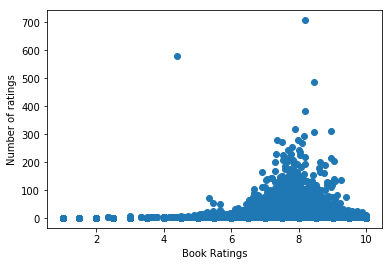

Pearsons correlation: 0.020


In [37]:
from scipy.stats import pearsonr
pyplot.scatter(mean_book_ratings['Book_Rating'],mean_book_ratings['Number_of_Ratings'])
plt.xlabel('Book Ratings')
plt.ylabel('Number of ratings')
plt.show()
corr, _ = pearsonr(mean_book_ratings['Book_Rating'],mean_book_ratings['Number_of_Ratings'])
print('Pearsons correlation: %.3f' % corr)

From the plot, it's clear that the books which are rated the most number of times doesn't really convert to highest average rating. With a pearson's correlation coefficient of 0.022, it's clear that our scatter plot assumption is accurate.

Since we are only interested in explict ratings for the anlaysis, we will now now merge the users, explicit_raings and books in to one table. The explicit_ratings and book table will be merged first by using the ISBN field

In [39]:
books_explicit_ratings = explicit_ratings.join(books.set_index('ISBN'), on='ISBN')
books_explicit_ratings.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch


Now, we will go ahead joining the user table with the books explicit ratings table to get the complete table

In [40]:
books_complete = books_explicit_ratings.join(users.set_index('User_ID'), on='User_ID')
books_complete.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Location,Age,City,State/Province,Country
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",34.0,seattle,washington,usa
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,"torrance, california, usa",34.0,torrance,california,usa
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,"iowa city, iowa, usa",25.0,iowa city,iowa,usa


In [41]:
books_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 1 to 1149778
Data columns (total 12 columns):
User_ID                383842 non-null int64
ISBN                   383842 non-null object
Book_Rating            383842 non-null int64
Book_Title             383842 non-null object
Book_Author            383841 non-null object
Year_Of_Publication    383842 non-null int32
Publisher              383840 non-null object
Location               381848 non-null object
Age                    381848 non-null float64
City                   381848 non-null object
State/Province         381848 non-null object
Country                381848 non-null object
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 46.6+ MB


## Build a collaborative filtering based recommendation system

There are two types of collaborative filtering namely,

1) Item based CF: This method recommends based on the similarity between items calculated using people's ratings of those items.

2) User based CF: This method identifies users that are similar to the queried user and estimate the desired rating to be the weighted average of the ratings of these similar users.

In both the methods, we need to create a user-item matrix built from the dataset with the users as the rows, the books as the columns, and the rating as the matrix value. Let us now create a dataframe having only User_ID, ISBN and ratings. 

Due to the limited computing power, I will build the recommender system using only a subset of the ratings. In particular, I will take a random sample of 10,000 ratings from 383K ratings

In [42]:
df_books=books_complete[['User_ID', 'ISBN', 'Book_Rating']]

df_books_reduced=df_books.iloc[:10000,:]
df_books_reduced.shape

(10000, 3)

Let us now split the dataset in to training and test data with 80% to be utilized to train the data

In [43]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(df_books_reduced, test_size=0.20)

In [44]:
print(f'Number of records in trianing set: {len(train_data)}')
print(f'Number of records in test data: {len(test_data)}')

Number of records in trianing set: 8000
Number of records in test data: 2000


In [45]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(df_books_reduced, test_size=0.20)

In [46]:
## TRAINING Data
# Take every unique user id and map it to a contiguous user
train_u_uniq = train_data.User_ID.unique()  
user2idx_train = {o:i for i, o in enumerate(train_u_uniq)}

# Take every unique ISBN and map it to a contiguous books
train_b_uniq = train_data.ISBN.unique()  
book2idx_train = {o:i for i, o in enumerate(train_b_uniq)}

#Map the train data
train_data['users_uniq'] = train_data['User_ID'].map(user2idx_train)
train_data['books_uniq'] = train_data['ISBN'].map(book2idx_train)


## TESTING Data
# Take every unique user id and map it to a contiguous user
test_u_uniq = test_data.User_ID.unique()  
user2idx_test = {o:i for i, o in enumerate(test_u_uniq)}

# Take every unique ISBN and map it to a contiguous books
test_b_uniq = test_data.ISBN.unique()  
book2idx_test = {o:i for i, o in enumerate(test_b_uniq)}

#Map the test data
test_data['users_uniq'] = test_data['User_ID'].map(user2idx_test)
test_data['books_uniq'] = test_data['ISBN'].map(book2idx_test)

C:\Users\ssumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ssumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\ssumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [47]:
##Create training and test df with unique values to sequential integers
### Convert back to 3-column df
train_data = train_data[['users_uniq', 'books_uniq', 'Book_Rating']]
test_data = test_data[['users_uniq', 'books_uniq', 'Book_Rating']]

## Create two user-item matrices, one for training and another for testing

In [48]:
## TRAIN MATRIX
# Create user-item matrices
n_users = train_data['users_uniq'].nunique()
n_books = train_data['books_uniq'].nunique()

# create an empty matrix of size USERS x BOOKS 
train_matrix = np.zeros((n_users, n_books))

# Use itertuples to populate values in the matrix.
for line in train_data.itertuples(): 
    train_matrix[line[1]-1, line[2]-1] = line[3]

In [49]:
## TEST MATRIX

## Create user-item matrices
n_users = test_data['users_uniq'].nunique()
n_books = test_data['books_uniq'].nunique()

# create an empty matrix of size USERS x BOOKS 
test_matrix = np.zeros((n_users, n_books))

# Use itertuples to populate values in the matrix
for entry in test_data.itertuples(): 
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [50]:
# Taking subset of matrix due to memory issue.
train_matrix_reduced = train_matrix[:1000, :1000]
test_matrix_reduced = test_matrix[:1000, :1000]

## Create cosine similarity matrices for users and books. 

Let us now calculate cosine similarity with the 'pairwise distances' function. This will compute cosine distance between user_id and book. The cosine distances will all fall between 0 and 1 as the ratings are in the range 1-10.

In [51]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_reduced, metric='cosine')
item_similarity = pairwise_distances(train_matrix_reduced.T, metric='cosine')

## Predictions 
For Users-books Collaborative Filtering, we need to take mean average rating of the users as the user rating preferences differs drastically. Some users are more lenient while rating the books where as others may not rate that well eventhough all th users have similar likings.

In [52]:
mean_user_rating = train_matrix_reduced.mean(axis=1)
# Use np.newaxis so that mean_user_rating has the same format as ratings
ratings_diff = (train_matrix_reduced - mean_user_rating[:, np.newaxis])

#user-movie Collaborative filtering
user_pred = mean_user_rating[:, np.newaxis] + user_similarity.dot(ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T

#item-item Collaborative Filtering
item_pred = np.array(train_matrix_reduced).dot(item_similarity) / np.array([np.abs(item_similarity).sum(axis=1)])

## RMSE

In [53]:
#Root Mean Squared Error for validation.
from sklearn.metrics import mean_squared_error
from math import sqrt


def rmse(pred, test_matrix_reduced):
    pred = pred[test_matrix_reduced.nonzero()].flatten()
    test_matrix_reduced= test_matrix_reduced[test_matrix_reduced.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, test_matrix_reduced))


print("Collaborative Filtering RMSE")
print(f'User-based: {rmse(user_pred, test_matrix_reduced)}')
print(f'Item-based: {rmse(item_pred, test_matrix_reduced)}')

Collaborative Filtering RMSE
User-based: 7.8568607470341485
Item-based: 7.857444603886737


RMSE of test model is a metric which measures the variance of estimator and bias. The value is so high which explains the data is overfitted .
Overall, Memory-based Collaborative Filtering is easy to implement and produce reasonable prediction quality. However, there are some drawback of this approach. Firstly, it can't deal with sparse data.Secondly, it fails predict for new users/items that doesn't have any ratings in the system.

Now, we will make use of built in models such as SVD and NMF to predit the user/item ratings as these are very well scalable when compared to memory based model and are easier to work on sparse data.

## Build recommendation system using surprise library

Model based collaborative filtering uses matrix factorization methods to find the hidden features from the given data. Singular Value Decomposition(SVD) is one such matrix factorization which we use to find the features in the vector space. SVD is an algorithm that decomposes a matrix A into the best lower rank approximation of the original matrix A. It decomposes matrix A into a two unitary matrices and a diagonal matrix:

In [84]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD, model_selection, accuracy

# Load Reader library
reader = Reader(rating_scale=(1, 10))

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(df_books, reader)

# Use the SVD algorithm.
svd = SVD()

# Split the  dataset for 5-fold evaluation
model_selection.cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6273  1.6412  1.6403  1.6359  1.6355  1.6360  0.0049  
Fit time          19.64   22.48   20.84   23.94   22.32   21.84   1.48    
Test time         0.92    0.54    0.80    0.75    0.81    0.76    0.13    


{'test_rmse': array([1.62726272, 1.64124788, 1.64026033, 1.63594763, 1.6355119 ]),
 'fit_time': (19.639752864837646,
  22.47737956047058,
  20.841808080673218,
  23.94009780883789,
  22.32467222213745),
 'test_time': (0.9204161167144775,
  0.5382740497589111,
  0.7991127967834473,
  0.7539803981781006,
  0.8117921352386475)}

In [85]:
#Let us now train the model and compute RMSE
trainset, testset= model_selection.train_test_split(data, test_size=0.20)

# Use the SVD algorithm.
svd = SVD()

# Train the model
svd.fit(trainset)
predictions = svd.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 1.6476


1.6475890499569257

Root Mean Square Error of 1.6475 is much better than what we got (7.85) using memory based recommendation system. Now, we will fine tune the parameters using Gridsearch to improve the prediction.

In [91]:
from surprise.model_selection import GridSearchCV

param_grid = {
              'n_factors': [20,30],           ##Number of factors
              'n_epochs': [5, 10, 20],        ##The number of iteration of the procedure
              'lr_all': [0.002, 0.006, 0.018, 0.054, 0.10, 0.15]     ##The learning rate for all parameters
             }
algo = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
model = algo.fit(data)

In [92]:
model = algo.best_estimator['rmse']
print(algo.best_score['rmse'])
print(algo.best_params['rmse'])

1.636197087942591
{'n_factors': 20, 'n_epochs': 20, 'lr_all': 0.006}


In [102]:
# Lets now train the model with new set of parameter value and check how the RMSE varies.
model = SVD(n_factors=20, lr_all=0.006, n_epochs=20)
model.fit(trainset)
test_prediction = model.test(testset)
accuracy.rmse(test_prediction, verbose=True)

RMSE: 1.6394


1.6393997630879813

There has been slight improvement in RMSE after hyperparameter tuning. We will now make use of the get_top_n function to get top 10 recommendations.

In [105]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [112]:
predict = test_prediction
top_10 = get_top_n(predict)

In [108]:
# Print the recommended items for each user
print("Results:")
for uid, user_ratings in top_10.items():
    print(uid, [iid for (iid, _) in user_ratings])

> Results:
55490 ['0446607657', '0198117477', '034538475X', '0816029091', '0553244949', '0553268945', '0451524934', '0385504470', '0886774012', '0517585839']
156230 ['8497630513']
110973 ['0553579908', '0385199570', '0380789019', '0553573403', '0451458206', '0670868361', '0316089699', '0553572997', '0375703055', '0965605914']
185287 ['349915398X', '3404125312']
240567 ['080411109X', '0446310786', '0440222656', '0804106304', '0440236673', '0312976275', '0452282829', '0684811073', '0060512822', '0767903862']
119904 ['0385720920']
121846 ['0805208488']
60244 ['0345339738', '0060928336', '0064471047', '0345391802', '0020868308', '0141301058', '0765342294', '0823401898', '0553274295', '0877733759']
273342 ['0142001430', '0373301316', '0440210895']
23288 ['0721404537', '0307159809', '1561791636', '0590421263', '0373240694', '0307131092', '0721405908', '0590419145', '0721407633', '0721405894']
236940 ['0786863137', '0446358754', '0061096962', '0881846872', '1883478227', '093158096X', '0743202

272983 ['1565122992', '052594530X']
10924 ['0195101685']
99347 ['1571456988', '0582077842', '1551666189', '0060809248', '0393968227', '038546889X', '0310379504', '0345439104']
44376 ['0689818769']
96448 ['0440406498', '0380702843', '0064410129', '0590692062', '1593070527', '0590435094', '0380720132', '0805063897', '0590567330', '081673027X']
249894 ['0671720147', '0064401774', '0671875965', '0449006700', '0671878921', '034538265X', '193227023X', '038512483X', '0380728265', '0345388232']
155223 ['0395069629']
238817 ['0802134491']
72352 ['0553567756', '0373226217', '0515108707', '0373885024', '0843941995', '0505524635', '0843935685', '082171841X', '0843941081', '0380786036']
112001 ['0688170528', '0553290789', '0804111898', '0679429220', '0451403789', '0312284683', '0899193099', '0452284694', '0517368366', '0425145301']
7792 ['0812932773']
167038 ['0446611913']
164926 ['0836221362', '1558212051', '0395783216', '1578565375', '0310225841', '0399214321', '0938635859', '0395964644', '034544

107616 ['0671740288']
180322 ['8481091693']
163804 ['0385484518', '0345388771', '0399141146', '0671001795', '0060391839', '0671023209', '1551667010', '0553268880', '0515128546', '0451180410']
17917 ['0440226104', '0345440951']
93092 ['0448405202', '0440415829', '0142004235', '0060987561', '0786866314', '1591605296', '0439101352', '1558749780', '1885223943', '0671792806']
81298 ['0842329242', '0440208351', '0385261918', '0842329277', '1558747613', '0440227194', '0316601950', '0786817879', '0375727345', '0671042858']
113898 ['0971879796']
111977 ['0744560497']
93691 ['0062513117', '0380717514', '0671520466']
143175 ['0786863137', '0671578987', '0425133516', '1401397522', '1551664968', '1570428581', '0380756250', '0316655880', '0804119937', '1567403115']
3363 ['0553213164', '0064460932', '0446605336', '0060294698', '0140186484', '0446672211', '0448190834', '0345403339', '0374336644', '0345427297']
44559 ['0345422317']
238120 ['0671004565', '0451205146', '0684803763', '0440200989', '067170

120598 ['0375411550', '0880709391', '0963163809', '0673150860', '0070314446', '087973664X', '0835917789', '0399143629', '0671868691', '0425174271']
129687 ['3446202218']
217565 ['359614325X']
263733 ['3426618303', '3499227444', '3596223946', '3827002850', '3596105889', '3423118717', '3729402293', '3423122323', '3442760704', '3499133261']
35033 ['0552996181']
66708 ['0399137807']
149647 ['0618129022', '849550152X', '8432216089', '1400000300', '8434815982', '8401474620']
93453 ['0553802542', '0446612790', '0671525832', '0743474155', '0553582755']
212130 ['0425119920', '0451181379', '0425132951']
247241 ['0805061835', '044922046X', '0312980159', '0553574663', '0373483694', '1551668300']
136193 ['0446530085', '0783815603', '0375706410']
138393 ['0671751174', '055356854X']
106225 ['1573229571', '0385484518', '0553210793', '0345447840', '0440221420', '0679441220', '037325038X', '0743463080', '0156008661', '0812968131']
227295 ['0439010780', '0416196500']
268600 ['0671455966']
31468 ['0425153

235774 ['038071986X']
26544 ['0515122734', '055358264X', '0380798875', '1561380156', '0060950617', '0451202708', '0679776419', '0276420144', '0030437113', '0914440934']
55187 ['0670032379', '0865471185', '0385292163', '089526532X', '0446323527', '0345404475', '0671673114', '0842346643', '1564588750', '0062500309']
231252 ['0316096199', '0553574086']
139913 ['0670894605', '0515107867', '0553280368', '0452282152', '0553280341', '0373484410', '0451199685', '0151008116', '0812567099', '0451202317']
18323 ['0743211189', '0767904664', '0821223666', '0694517267', '0684831066']
178478 ['0373292422', '0373226756']
136326 ['0312265867', '0670813028', '0385503008', '0425124622', '1551669498', '0679454489', '0345390458']
4149 ['0385508417', '1568842406', '0842329129']
171251 ['0140112499']
121518 ['0895261901', '0440223555']
258534 ['0805063897', '0312983867', '038073267X', '0385498721', '0449223604', '0060652934', '0515113719', '0553271636', '0425154092', '0449221504']
120396 ['0671525743', '0446

179050 ['0064403114']
169824 ['0345391802', '0345309979', '0671023209', '0345300793', '0345330005', '0684800713']
271466 ['0345423615', '0446403385', '0553574280', '0446532215']
20032 ['0393312836']
195904 ['0140196099', '0679429220', '0786867345', '0316525405', '0060927569', '031219241X', '068485466X', '1570717206', '0912670096', '0253338247']
76583 ['1852428279']
73651 ['0152162577', '0440228352', '0553579142', '0064472914', '1892065029', '0345438329', '0515130389', '015216250x', '0886776449', '0812542991']
248656 ['0141301058', '0060092572', '0373165129']
62662 ['0061043176', '0842314792']
250477 ['0061093084']
232131 ['059035342X', '0316601950', '0060934417', '0446603716', '0425182878', '0425117383', '0060921145', '0345360354', '0786862564', '0385187866']
95301 ['0451453573', '0140387498', '0044423160', '0800718372', '0330415557']
11179 ['0571135390', '0060504072', '0807004553']
187922 ['1931561648', '0393324826']
207494 ['0380015676', '0441002935', '0671727893', '0441106269', '006

128727 ['0142001805', '0805062734']
44842 ['0671769227', '0743436806', '074322311X', '0385490992', '0060005726']
64010 ['0140158391', '0892813695']
122037 ['2253149101', '3829050372', '3784415806', '3518391143', '3499233843', '3518398091', '3821835257']
178914 ['0805064222', '0553071807', '0345434684', '0385314124', '0894805002', '0061053538', '0684867621', '1880032929', '0743211383']
27143 ['0590877437']
220296 ['033039892X']
223525 ['1588720306', '1588720004', '158872008X']
208147 ['0312971346', '080410753X', '0310241006', '0373483554', '0440215994', '0688177751', '0449224260', '044023722X', '0380790076']
145969 ['0394587863', '1930586574']
230139 ['3442553253']
74722 ['0385420137']
203649 ['0446532231', '1582450854', '0679446281']
34087 ['0451206681', '0061030597', '0440160677', '0061031070']
213324 ['0753506963', '0750015810']
52199 ['059035342X', '0312954468', '0525946497', '0451404351', '034538024X', '0590383892', '0671622021', '0380798956', '0374523444', '0373058470']
246318 ['0

101866 ['0860683036']
72017 ['0345350499', '0671510053']
158172 ['0140072853', '0451194063', '0140293248', '0786885688']
161662 ['0312983824']
133654 ['0899663001']
253106 ['0460877356', '1903517044']
72318 ['0140298487']
101620 ['0380753006', '0312980140', '0312265859', '0380776510', '0380899825', '0671875019', '0373240716']
256631 ['0679457526', '3257201095']
69830 ['0872863379']
214138 ['0743437640', '0446613266', '0671014196', '0061007269', '1551664836', '0743460529', '0440216745', '1551666952', '0553272837']
229339 ['0446601543']
182053 ['0786808551', '0060248025', '0345384466', '0316095133', '0553575341', '039454689X', '1568460937', '0500092907', '0393094006', '0425126870']
56307 ['0515135739', '0451526384', '0440211727', '0743412621', '0440225701', '0061015725', '155166674X', '0312952813', '074341232X', '0553575538']
99322 ['0553574116', '0671737619']
42497 ['0156586703']
124096 ['0345390059']
131027 ['0375422307', '0553351397', '0684871483', '0553573616', '0007116993', '0142400

187043 ['0553379615']
89447 ['8423307247']
57412 ['0152164561']
48355 ['0439136350', '0449206440', '0765341301', '0756400082', '1931686351', '0345409469', '0446602604', '0765301679', '0679746749', '0061054437']
277901 ['089480751X', '0525458417', '0679427430']
28735 ['1856190161', '039568093X', '0718121449', '3499227002']
10699 ['0352332352']
243142 ['0060976845']
174987 ['0448421542', '078534800X', '0749838809']
158427 ['014023828X']
156726 ['0595125077', '0446518581']
62929 ['0312932812', '0767912241', '0451212401', '0312983824']
237091 ['0671553011', '0743216342', '0670849618', '055380247X']
204663 ['0064400557', '082451646X', '1558611940', '0440205085']
89507 ['0743444329', '0316602906', '0385335830', '0767908481']
253655 ['0064407454', '0452284015']
62542 ['0385504209', '0452283205', '0399146296', '0553800965', '0743221990', '0316781266', '0312983271']
12341 ['0140304770']
19970 ['1891620428', '0684831139', '1561840513']
141373 ['1879360292']
127701 ['9709161512']
43520 ['88078159

15479 ['0380789019', '0812551605']
244097 ['0515136263']
104053 ['0385501412']
181165 ['0684862719', '0752804510', '038549503X', '1573220973']
53174 ['0345313860', '0812511816', '1561483176', '0811831620', '0517881004', '0671578987', '0064409430', '0312873972', '0886778972', '0743407393']
4017 ['0060930187', '0060915544', '0345424719', '0688176992', '0688177859', '0312283474', '0395977711', '0743439740', '0345433491', '0060929871']
86276 ['0671010239', '0671018051', '0515129224']
28204 ['0330246631', '0451166892', '0393039242', '0330312367', '034078721X', '0156005891']
31466 ['0345439112']
269602 ['0345465083']
21357 ['0399138994', '0376038608', '0375501509']
50650 ['0394820371']
214920 ['8408034162', '9505111894', '8478090665', '8401492726']
138073 ['0006281257', '0007119666', '075531056X', '0718139593', '0349102147', '0452281326']
143792 ['0060938455', '014100018X', '0385497695', '0609804138', '0440204887', '0060507403', '0316293903', '0375701850', '0385491085', '0802139868']
246470 

2033 ['0060256737', '0812575717', '0060248025', '0553573136', '043935806X', '0671027441', '0451456718', '0451459423', '0812521358', '0142500135']
230878 ['0060914653', '0375709061']
92027 ['0743224574', '0374129983']
210903 ['3423032383']
26548 ['0394732928', '0671703625']
159275 ['8811666376']
53802 ['8495501015']
119578 ['068809368X']
30779 ['0590376195', '0440940001', '2894281293', '0061065919', '0866119566']
9414 ['1853260010', '0140351140', '0552998524', '0971880107']
109691 ['1844262553']
160735 ['0316789089', '038531292X', '0385332963']
126810 ['0425178234', '044023574X', '0425168220', '0061098361']
44362 ['0451195442', '0922729484']
189421 ['2253154814']
208708 ['0671470884']
211231 ['0425145301', '0345353145']
216225 ['0671551663']
163876 ['0345382846', '0898156122', '0451451538']
193499 ['0316666343', '0399141146', '0142001805', '0345465083', '0553574566', '0440127793', '0451158059', '0609804138', '0821776118', '0425109283']
41429 ['1583140565']
98072 ['0446603309']
238642 ['

152568 ['0425110427', '0440161592']
136465 ['0767908260', '0446357251', '0140267697', '0440219795']
245698 ['0425158551']
256484 ['0804115435']
10750 ['006019393X', '0688169082', '0460873946']
260316 ['0451169530', '0345257189', '0446607657', '0345316991', '0446671002', '0425176932']
185385 ['0316341088']
251016 ['0808403370']
33582 ['0743418743', '0812512774']
202346 ['0525947299', '0684195305', '0684195976']
76865 ['0451526341']
38781 ['0843948264', '1551662604', '0373225717', '0061082228', '0373259530', '0821768301', '0843948809', '0440236908', '0843949171', '037327209X']
114611 ['0871233428', '0445409134']
238418 ['0345350170']
102669 ['3404145461']
134251 ['0312990456']
92405 ['006098824X', '044900256X', '0671034006', '0385605145', '0312983271', '0446609943', '0971880107']
110651 ['1573220876', '0879517220']
176233 ['0140430016']
110308 ['0765300346', '0449211991', '0061013951', '0380790297', '0671756443']
146649 ['8478884459', '8496136426', '140120113X', '8434822091']
65409 ['006

114085 ['0345339681', '0842329277', '034537522X', '0345375211']
208095 ['0671872958', '0688074790', '0898865425', '0451183665']
254224 ['059035342X', '067172262X', '0345378482']
68622 ['0385509006']
148604 ['0553582801']
49043 ['880781028X', '8838910170', '8838917299']
31053 ['0439064872']
62716 ['0440998050', '0441006000']
38832 ['0743224574', '0671224484', '1890451053', '1561631701', '0399504532', '0802133487']
91383 ['0525482059']
231567 ['0451196716']
273110 ['0922066728', '0373242174', '0345421248']
34215 ['0679785892', '185326086X']
101338 ['0689821867']
223734 ['0440217520', '0590338498', '0679810528']
209434 ['0747232024']
218325 ['0399506438', '0425076741', '078795599X']
23459 ['031298250X', '0786010800', '0451197038']
94815 ['0679725768', '207038165X', '2020046059']
65605 ['0446519960']
63993 ['0590494457']
242364 ['0312305060', '0963491768']
164167 ['0449208672']
135262 ['0515135062', '0451209311']
75560 ['068484477X']
178035 ['0449219364', '0440211727', '0345312007', '03303

156909 ['0971922152']
98425 ['0446603589', '0061013420']
242073 ['1556616120', '0345441133', '0804107432', '1551666634']
110040 ['0345400011', '0767905385', '0446611867', '0312969007', '0060951176', '1565843444']
220314 ['0671743481', '0762402539', '0312148631', '0425050564', '0517556480', '1573240109', '0812543262']
103144 ['0679821481', '0679880909', '0385498543', '0060219807', '0061062820', '0553493108', '0027354318', '0349101779']
72999 ['0060975849']
277954 ['0500976147']
278194 ['0671683993', '0440241537', '0553582364']
67677 ['0767905938', '0376029110']
125203 ['0553213164', '0553153277', '0553213172', '2253140872', '2890525740', '220311892X', '2070368785', '2070367401', '059087764X', '1558748040']
49313 ['006019491X', '0060988258']
269592 ['0312283970']
3393 ['0425191184']
15510 ['0385503822']
180042 ['0440213525', '0060976845', '0771099975', '0316666343', '1550223968', '0373123337', '0671003755', '0385234104']
57712 ['0375706771', '0395877555']
168034 ['0446605409', '044632352

193999 ['0764222503']
40316 ['0345369106', '0451182987']
28220 ['3442727952']
113903 ['0156027461']
98804 ['0312243022', '0156628708']
76111 ['9681606078']
23636 ['0440418518']
275909 ['8433914758', '9500700921']
135411 ['0060959037', '0060987561', '0452282152', '1879181037', '0679432477', '0140096930', '0385333412', '006000438X']
247521 ['0440411254', '0804106436']
208648 ['0961462000', '0452266556', '0449004023']
87712 ['1558745157', '0312925883', '0060987561', '0316108677', '0590406191', '0786868619', '0590440675', '0590300946', '0316168815', '1558746153']
234765 ['1563895730', '0671004107', '0380789035', '0451451384', '158469047X', '1853261440', '0871401347', '0806511915', '0804111359']
223990 ['0822310732']
212142 ['044020562X', '014032870X', '0671661426', '1568651902', '0380815923', '0380791986', '0140298479', '0965307883']
120188 ['3423013907']
244456 ['0060928336', '0140149074', '067975511X', '080411109X', '0440225922']
139742 ['0375701907', '0965583775', '0671696483', '0060932

222082 ['0553103733']
269245 ['0451526341']
216343 ['0595274862']
222296 ['0394747232', '0140179836', '0156027321', '0385498411', '0393312836', '1580050158', '0679401407', '0670031909', '067944999X', '1570032246']
261941 ['1558743316', '0671014765', '1558746153', '0671039857']
163851 ['0451168615', '0822004437']
160171 ['0316601950']
130679 ['1558747435']
75860 ['0517693119', '1581170602', '0375802916', '0670892084']
176236 ['0786881852']
236595 ['0064471837', '0060278250', '0515122408']
242106 ['0553107305', '0965327507', '0743482212', '0380780860', '0553582127', '0393968030', '0821720554', '0394524063', '0425167801', '0553572040']
273752 ['1582342695']
267040 ['3442442354']
91244 ['0345313151', '0446677450', '0764504193', '0737003219']
119914 ['840802339X']
205979 ['0860074382', '0375702202']
782 ['0975311255']
100210 ['0380820293']
230490 ['0671025325']
223768 ['0743467221', '0525946373']
117483 ['0345463153']
263030 ['3442451671']
213134 ['0966258606']
172731 ['0671885243']
7980 ['

260388 ['0449206440', '0671698850', '0375756981', '0446600253', '0375703195', '0452260116', '0141000198', '0812584279']
30385 ['0743456645', '0571216420', '014026065X']
134596 ['0425113299', '0843932953', '0671733885']
120165 ['2070556859']
11487 ['0380802325']
150767 ['1551667339', '0451211049', '0425193780']
75482 ['0345257502', '0345325990']
118418 ['0060165529', '0062512455']
252657 ['0393316041', '0553577808', '0553574566', '0156468999', '0140047433', '0201408252', '0385261837', '0374347964']
238779 ['0061031410', '1400034779', '068482468X', '0804115761']
235684 ['0380709562', '0440200989', '0425155064']
62680 ['0316754323', '0373195567']
127113 ['0385315546', '1878448900']
63044 ['0140115765', '0151005044', '0394585852', '0670809160']
240843 ['0553375407']
252491 ['0671578340', '0451180151', '0373262892']
102132 ['0425154637']
218636 ['0316776963']
224269 ['0140512047', '1740591178']
199442 ['1573220825']
216098 ['0451179900']
43388 ['0345427130']
179327 ['0060938455', '059029835

223953 ['0064471047', '0894712063', '0517562898', '061815082X', '0020442106', '0395957990']
274220 ['3548603203', '3471772707', '3426618095', '3423050012']
85216 ['0553565915']
78621 ['0596001703', '0201541998']
15475 ['0743237188']
11514 ['0892966505', '0553564528']
51945 ['0375700757']
3326 ['3257224974']
217695 ['1888173084']
64270 ['0743418174', '0743225082', '0670896764']
150567 ['1841193615', '0552999458']
223461 ['042519471X', '067972883X', '0060534044']
159123 ['0425154092']
168773 ['1857230302']
115759 ['0399128409', '0385294182']
165516 ['0894711466', '0671021001']
97200 ['0425164349']
49637 ['0515110752', '0062501860']
276391 ['8433967401']
190996 ['0375727345']
25261 ['0373097549', '0345447867', '0446364800', '0380000725']
142017 ['0452262143', '0553578693', '0394587952', '0312971842']
10297 ['0192816276']
34428 ['0062502182']
227851 ['0515129224']
1535 ['006017935X']
41221 ['0449911519']
261105 ['3522128001', '3499221527', '3257231199', '3442545420', '3442750547', '3492229

164036 ['006440823X']
78901 ['0140185011', '067091021X', '0763606995']
136093 ['0064407055']
43251 ['0140345353']
108488 ['0679745203']
217796 ['3505109940', '3423781890']
7958 ['0385730586', '0375504613', '0836217152', '0671733346', '0679748407', '1565122011']
55700 ['0586080198']
223115 ['0451524403']
47861 ['0312962657', '0894861611', '0312283709', '0886777232']
214034 ['0679450548']
16488 ['0394700023', '0874775442']
93796 ['1573220493']
99102 ['0312976275', '0373261527']
216652 ['349926191X']
38138 ['1573229083']
174897 ['0843115653', '0590477412']
159520 ['0515124621']
82511 ['0446523569', '044900371X', '0352324368', '0684872153', '0375703063', '0449910571', '039914210X']
229742 ['0192832530', '0688177751']
61408 ['0374480133']
199870 ['0786868716']
93387 ['0395926882']
203380 ['0553272535', '0684856220']
122349 ['0671027360']
38590 ['0312861605', '0441007244']
170273 ['3596257220', '3423127023']
168478 ['0373501838', '0743442318']
190462 ['2070368475', '2707303143']
31846 ['0452

137190 ['0141007338', '0393958280', '0552998486', '226401699X', '0751520276', '2264004630', '1853811262']
214937 ['0786002735', '0446607207']
236173 ['0002558122']
263383 ['0452269571', '0380782782', '0446608653', '0380767635', '0804106436', '0373871309', '0345380371', '0440222656']
59656 ['0385484518', '0922066728', '0821228307', '1561451010', '0935309225', '1560549785', '0525946233', '0743230655']
108379 ['0471117099', '1864501243', '1580622240', '0747528306']
72732 ['0671722778']
241992 ['3423781483']
43661 ['0062515918']
11224 ['0679444815', '0553380095', '0525945938', '0312927746', '0670892963', '0971880107']
196049 ['0316969680']
103074 ['0451130448']
49766 ['0060175532']
145324 ['0380789019']
8858 ['3404118960']
5297 ['0099771519']
100471 ['0375727345', '0345443284']
224899 ['0595160328']
72004 ['0849953537']
93837 ['0877733759']
103251 ['0425185710']
88256 ['068484477X']
94814 ['0671021001']
188355 ['0743211316']
249223 ['0441008658', '0553377868', '0345379845', '0380710439', '

195416 ['0451207521', '0399528199']
232211 ['0060934719', '0553377868']
261635 ['0893817279']
29117 ['8838918600', '8806134701', '880449509X']
179058 ['042510429X']
23127 ['8420725927']
71761 ['0195108973', '0684867672']
256158 ['0140442529']
152696 ['0345413903', '0446611808', '0446605239', '0446608270']
92938 ['0450588866']
170816 ['0316693707']
194458 ['0895297132']
210791 ['0399144706', '0345468694']
12428 ['0345416880']
37504 ['0446608955', '0671001957']
135321 ['1551660474']
270234 ['0440213525', '0451162625', '0440205573']
169255 ['0312283709', '0609810022']
17645 ['0380718340']
71502 ['0425152251']
265546 ['0679429220', '0451099648', '0060195932']
10412 ['0671038850']
107523 ['0451153553', '0061009059', '0395272211']
180719 ['2749101263']
209436 ['1585671169']
67288 ['0316603570', '0553800973', '0446531480', '0345426266', '0312991509', '0446530239']
252903 ['0140707344', '0521425069', '014070714X', '0747557853', '0140123083', '0571117422', '0141182466', '0750029943', '014118698

69028 ['0446603643']
154309 ['3492045170']
230400 ['1558175865', '0449235483', '0515102652', '0312963963', '0515127833']
8529 ['0439064864', '2080701819', '0595014283', '2070516504', '2070401685']
151481 ['0316666343']
163867 ['0060162945']
93098 ['0345347226', '0451407830', '0743225406']
44686 ['0394805720']
145546 ['0553568019']
227292 ['0140296298', '0671528904']
75783 ['0070037485', '0684196697', '0679420681', '039474330X', '0140430091']
96215 ['0553070037']
41103 ['1558745017', '155874262X', '0671519980', '0006375227']
74201 ['8804483946']
65549 ['096189167X']
20388 ['0670891576']
276644 ['0743255429']
263250 ['8838910170']
215024 ['059049449x', '0590477455', '0590494481']
40222 ['0842329218', '1562010468', '0131283804', '0816151091', '0831711868']
136658 ['006016042X']
102363 ['0767900383']
154583 ['043912042X', '0439159849']
48217 ['0312932081', '0156011484', '0399140751']
196614 ['0688103464']
135163 ['0425152251']
78571 ['084994371X']
261590 ['0345413881']
225943 ['0061097306'

263561 ['0590568930']
201664 ['0590332104']
5971 ['085045512X', '184176311X']
117642 ['0517201992']
109388 ['0553272535', '0590440012']
191803 ['0743204700', '0743400828', '0312252250']
72282 ['0812534077', '0440241073']
127189 ['0446600253']
185 ['0380778556']
159004 ['034536208X', '0060953691', '0374525056']
175815 ['0891075275']
180155 ['0349101779']
251251 ['0553583166', '0446604844']
129489 ['0425143333', '0449006522', '0425155404', '0425119653']
101699 ['8473863852']
183999 ['0140031928']
269198 ['0312182015']
82001 ['0226143929', '0805011668', '0449211126']
254863 ['006100264X', '0446609617']
95049 ['0440222699']
212490 ['0553101749']
131246 ['0380818876']
33307 ['0380750848', '8478886559', '188691026X', '0140437843', '1901680029', '0451161351']
54130 ['0440221471']
111451 ['0446679593', '0451184718']
93954 ['0671001310', '0553578057']
99025 ['0439064872', '0060938099']
12956 ['0965834522']
161476 ['0446601241', '0451099648', '0140434011']
129444 ['0440201969', '0823083276', '00

114292 ['0609809431', '074323782X']
237575 ['0345443284', '1573229326']
115671 ['0821769367']
99517 ['092008091X']
138698 ['0140027661']
144885 ['0590366831']
42408 ['0385335482', '1566913101', '0440235596', '0671021001']
165392 ['0385413041', '0060928336', '8420483532']
245224 ['0752809431']
260699 ['1566196256', '0316601950']
62776 ['0671501283']
151643 ['0449006522']
163140 ['0312979487']
5766 ['0441009239', '0312924801']
111680 ['0821769367']
199494 ['0385720106']
159159 ['1576737284']
239834 ['0375505547']
111657 ['0030102006', '0609801414']
258747 ['0933638094']
192121 ['0345335511', '0451523326']
252953 ['0061054674']
36912 ['0671867156']
71109 ['1569246815']
59548 ['0671004565']
50836 ['0440184053']
52060 ['0441516645']
248479 ['0006385427', '0517387700']
21618 ['0449209628', '0553268880', '0451523067', '0140350543', '0805051783', '0425092917', '1573229881']
192068 ['2070381161']
273133 ['000637610X', '0552999504']
28548 ['1558742913']
157218 ['000649613X']
156983 ['0449907481'

139156 ['0375702709']
57204 ['0345310020']
172010 ['1569316430', '1568361173', '0345409671', '0875421318']
238475 ['0380798646', '0312306113', '0373764731']
26538 ['1558745157', '0785319190', '059045367X', '0439139287']
271836 ['3453217276']
158912 ['0515129232']
259649 ['0671042262']
230385 ['0914839152']
275383 ['1566091713', '0801483905', '0312178484', '0553256173', '0446515167', '0452269334']
38595 ['0375811648']
268343 ['0743442237']
209595 ['0743230051']
100903 ['006109921X']
123015 ['1400034779', '0449909557']
34608 ['0440212723']
33345 ['0684859262']
159146 ['0451157443']
157655 ['0380977974', '0670820849', '0450411435', '0061099015', '0446603929']
161899 ['0375719180']
252085 ['0849911796']
170982 ['0130819336', '0140075968']
90153 ['0394820371', '0671781693']
13181 ['0752803409']
165406 ['0452282276']
79281 ['0671541730']
170767 ['0373825099']
269570 ['0446607193']
161903 ['051511779X', '042519387X']
236840 ['0811802981', '0061096105', '039914496X', '0679841571', '0425178765'

162596 ['0140291091', '0375705198']
166424 ['1558745157']
95509 ['0743445090', '0451451430']
177744 ['0887307655']
223059 ['0446322180']
183985 ['0345435532', '031214573X']
268540 ['0373711956', '0446527793', '0671019716']
22351 ['0375724443']
263504 ['0340710292']
46546 ['0944072801']
205886 ['0879979283']
266963 ['0743233026']
223268 ['0446604089', '0312927746']
258599 ['0312278586', '038572179X']
242245 ['1551668718', '0553578960']
8141 ['0451203569']
160130 ['0670829994']
101154 ['0553142070', '0425137007']
147804 ['0671034057', '0373196482']
102727 ['0192752006']
5333 ['0440213525', '0425154092']
158344 ['0394749774', '1852274743', '0192836528']
20428 ['0570039983', '0395501237']
141201 ['0446315001', '0446611239', '0679431977']
185978 ['0590036467']
184923 ['1403374953']
237605 ['0312977026']
176656 ['1592400876', '076790592X']
218197 ['3612266691', '3453169352', '3442085160']
152016 ['0440998050', '0971880107']
9177 ['0061015725']
242715 ['0440212561']
52323 ['3458345132', '3518

121594 ['0763616052', '0375410627', '014130636X']
140826 ['3499154277', '3775120661', '3525603460']
163612 ['0671021001', '0515118230', '0812910818', '0440213282']
48899 ['0439064872', '0448060094']
108706 ['3453146972', '3499137712']
237046 ['0385720483']
146026 ['0425175405', '0380710218']
2136 ['0399143335']
247124 ['0312965788']
187574 ['0062502182', '0061014230', '0812540360', '0440236673', '0670888702', '0515136557']
275034 ['1592910122']
115252 ['0684865742']
213064 ['0671028367', '0671011367']
167438 ['2877302202']
81927 ['0440211727']
206600 ['340414693X', '3430193672']
224435 ['0062740105', '0449911535', '0671468200', '0684867621']
236269 ['0679805273', '0345337964', '039395871X', '1577487419']
10951 ['0385508042']
242135 ['0590414674']
272430 ['0440410010']
261197 ['0609609491']
261940 ['0809015803', '042506428X']
110572 ['2070360644', '2253154393']
266419 ['0821770209']
50605 ['0345368436']
209385 ['0804102988', '0060148330']
122714 ['344272189X']
105227 ['9500359081']
1983

85348 ['0380429454']
150762 ['0140430725', '8445904116', '8439707444', '8467004983', '0140431020']
102674 ['037316887X', '0373073658']
275481 ['0743469844']
16718 ['0517702606', '037541326X']
260505 ['0671517635']
109247 ['8420613487', '842045804X', '8474441560', '8420613460']
9178 ['0425180638']
208009 ['0836223012']
138525 ['0671878719', '0451458028']
136118 ['0440343194']
96876 ['0915811006', '0394514386', '0892131284', '0553814516']
68500 ['3404142357']
206013 ['014027927X']
169932 ['0842329129']
160548 ['0440404908']
8855 ['0681403225']
151630 ['0399148027']
92431 ['0140018980']
122883 ['0886779065', '0345375580', '0345285549']
266872 ['0316284955', '0375706410', '014014773X']
262151 ['0316782505', '0517631741', '0399518118']
25806 ['0440193281']
75177 ['0884270610', '0525934960']
106426 ['0830605975']
109873 ['0892965177']
32641 ['0440213525', '0440220602']
93595 ['0061014591', '0060562978', '0060193670']
183566 ['1558747109', '0451523326']
52504 ['061812733X']
119582 ['037550400

103067 ['0345439244']
149140 ['0373707185']
275466 ['0786867647', '0312975732']
28448 ['0425152499', '0684801469']
110112 ['0812511816', '0345303253', '0451458311']
36656 ['0971880107']
66412 ['0385721420']
22121 ['0140119906', '8486478448']
243918 ['0375706771']
44435 ['0061012289']
193322 ['0061000035']
203723 ['0523423934']
32028 ['0553260111', '0425140946']
68447 ['0140390464']
103342 ['3522171810']
159870 ['0786014210']
146078 ['0805073337', '0446530891']
208415 ['0399146431']
245703 ['0330354566', '0552999458']
62383 ['0805063889']
40612 ['0670839809', '0684832291']
71477 ['0486264696']
131213 ['0141181230', '0140057242']
207293 ['059514196X']
262700 ['0375506276']
119541 ['0743411331', '0385332998']
41080 ['034540288X', '0440235162']
44331 ['0688066836']
167880 ['0373245459']
155005 ['0440241413']
35185 ['0963198106', '0849908663', '0785332286', '0883681706']
101095 ['0316926108']
31204 ['0800751817']
13259 ['0767902521']
262130 ['0060512806']
242334 ['3442447186']
113721 ['0881

149682 ['0446610100']
136290 ['0806908335']
47384 ['0440904196']
249848 ['0312282990']
119439 ['3499205874']
193248 ['0451524934', '1572460792', '0930439236', '0029081009', '0945466072', '0671633813']
236433 ['0452260310']
5385 ['1555834310', '0399518460']
165352 ['0812552547']
123132 ['0316776963']
195548 ['0061054089', '0812530063', '0345402308']
73883 ['0345441494']
18341 ['0345302575']
36603 ['0671774670']
170314 ['8477204055', '8484508935', '8466609792']
182071 ['0679463046']
235656 ['0702226106']
259542 ['0670849707', '0345278313', '0380812894']
136291 ['0345341678', '0312851405', '1565048539']
83880 ['0553272535', '3882210133']
228430 ['0316693006']
115342 ['0451204948']
119066 ['0671009834', '0312305060']
185519 ['0380817624', '0440213991']
144717 ['0805057633', '0805057862']
77329 ['0060162767']
80023 ['3492270409']
158127 ['067946333X']
177459 ['1565041992']
115953 ['0875421180', '0758205430']
191766 ['0060392452']
29748 ['0553573357']
278832 ['1558745718', '155874262X']
1174

205642 ['0140276823']
269372 ['0553269321']
201794 ['0451207084']
165290 ['0446604100']
237477 ['0452284236']
226139 ['0571216420']
94519 ['0425161501']
195714 ['8472236552', '8475961762', '8478887865']
98333 ['0553291955']
163169 ['0441005489']
88734 ['0060934913']
6577 ['068484267X', '1573225487', '0425181464']
65760 ['0765190605']
82171 ['2253149101', '2080707876', '2213615454']
105986 ['006109157X']
98097 ['0345465083']
13280 ['0375700757', '038542471X', '1566197198', '0156000520', '087483435X']
182445 ['0345435168']
74051 ['0316769509']
229069 ['0743217144']
109223 ['3442727529', '3404119215']
270587 ['0670857203']
157079 ['0397319266']
105881 ['0140065504']
109783 ['0060392452', '0571212018', '0312291639']
190807 ['0373273037']
85455 ['0671004549', '0553280147']
253405 ['0142000809']
55142 ['0385336179', '0312986769', '0425182010', '0425185249', '0425184323']
87579 ['0375700757', '0441317502']
244964 ['0552998478', '075531073X']
174062 ['042517140X', '0743411358', '1879431939', '

164206 ['8878186880']
140293 ['0156027321']
227501 ['0671686151']
53397 ['0440223814']
81324 ['0553801341']
90322 ['0553279912', '0671886665']
21617 ['0060920084', '0452282934', '0345389964']
48809 ['8472236552', '8420464384']
54392 ['0553569910']
88647 ['0553289411']
112530 ['3453177622']
185694 ['0375409270']
237101 ['3767210010']
117796 ['0890438439']
123801 ['0316666343', '0553273809']
263413 ['0505525542']
199088 ['0375504907']
207797 ['0523423934']
150110 ['8806158023']
81573 ['1573225312']
91423 ['0893753467', '1565791193']
203434 ['0809230550']
46276 ['0316781142']
35865 ['1561380156']
60140 ['0312265859']
80797 ['0679454403']
253322 ['0670839809', '0786702087']
167611 ['0375700757', '0747528977', '0714539546', '0684867982']
262238 ['0449221504']
131143 ['0385421982']
91281 ['0802132758']
164641 ['0060392452']
127029 ['074320008X', '1879557495']
116743 ['0843944293']
273971 ['1565298667']
122743 ['0440206154', '0425181111']
96954 ['0963433229', '0061054275']
71521 ['0380720191'

36327 ['0446603996', '038071907X', '155874262X', '1576736792', '067175145X']
198726 ['0316800775', '0670910279']
42077 ['0679409041']
233810 ['0439296919']
2253 ['0446611212']
9460 ['155874424X']
184039 ['0140293248']
112247 ['0671400177']
207667 ['0060922532']
142137 ['0590437976']
83156 ['0380807319', '0786907878']
121817 ['0452284449', '0517703963', '0440224764']
211010 ['0553801910']
79550 ['0140119906']
195063 ['0749931116']
40052 ['0385492081', '0399141146', '0375713751', '0316826812']
106213 ['0743418204']
53140 ['193156146X', '0671737791', '0764222449', '0425171892', '0345417623']
206891 ['0446677450', '1558531025', '1571517138']
190321 ['0671758896']
2559 ['0060928336']
140749 ['0723245835']
178183 ['0553273914', '0316666343']
201654 ['0061065730']
124648 ['0312971346', '0312265859']
53054 ['0399145885']
253629 ['0385336810', '0553582747', '0812966732', '0345437691', '0446611921']
53245 ['0142000205']
240113 ['0312144075']
270336 ['3596137187']
209684 ['0425101452', '042512816

53623 ['0345453743']
237900 ['3551736545', '3548255582']
67364 ['0345423402']
135330 ['0312955006']
146722 ['0373835876']
171020 ['0671831208']
11643 ['0671004530']
37135 ['044023722X']
153810 ['0345391837']
48787 ['0330347772']
111189 ['2020220989']
98865 ['0385265700']
24781 ['0553278223']
130149 ['1559704756']
120167 ['0440201853']
18728 ['0812589041']
54932 ['0140275010']
82605 ['042513329X']
264058 ['0679459626']
120605 ['0425164845']
198967 ['0446600474']
182720 ['0552998486']
57296 ['0061020699', '0061059056']
65917 ['0688084885']
231603 ['0373218397']
190803 ['0749302283']
66661 ['044990928X']
65645 ['8477381968']
228329 ['0670840904']
35030 ['0385730586', '1560760478', '1567180183', '0060006048']
2906 ['2246567610']
59784 ['0140170480']
128404 ['0345444884']
79360 ['0679894454']
153674 ['0002253305']
232894 ['0316089699']
206959 ['1893622118']
255935 ['2266006452']
156908 ['3596111900']
151237 ['0821771493']
166864 ['0452282152']
77394 ['0099288559']
35179 ['0140012133']
26732

102456 ['088396631X']
71285 ['8420617458']
72250 ['0452282829']
100169 ['044041508X']
155613 ['3453136411']
61986 ['3453177746']
161222 ['158234082X']
177923 ['8479018070']
152090 ['0312421273']
205909 ['0312242638', '0786703083', '0070342059', '1559212470', '0515131660']
50735 ['1931561362']
92371 ['0399144463']
210708 ['0345340418']
20162 ['8836807356']
30181 ['0345380258']
116349 ['0316601950']
68066 ['1587880245']
21909 ['1573220876']
45672 ['0821737929']
81352 ['0836218310', '0452268060']
219992 ['0060920076']
52497 ['0425126048', '0133420159']
6929 ['0140051317']
177262 ['0553272535']
108376 ['0739200429']
138380 ['0553580930', '0553571931']
148986 ['0553289691']
914 ['3407805853']
220345 ['0553560204']
210840 ['0451206711']
134948 ['0312253192', '0452271312', '0525945938', '0399134832']
17778 ['0446603589', '0446611778']
226655 ['0515114693']
180759 ['0767905318']
68537 ['0425162486']
221257 ['0451191013']
35079 ['0761985611']
96026 ['1863304959']
140068 ['0312990456']
192460 ['

201323 ['0671021001', '0595653189']
153040 ['0451526341', '0140366938']
12756 ['0060959517', '0671527967', '0312266499', '0440136482']
199764 ['0767902432']
277710 ['0451210875', '0061015725', '0451210867']
145961 ['0312982615']
212761 ['0140622446']
30744 ['0425185419']
251642 ['0812519469', '0446361305']
78076 ['0151372810']
64316 ['0340370246', '0140049401']
14049 ['0671510053', '1853260207', '0345284364', '0704340879']
205458 ['8420482633']
18022 ['0743477154']
175612 ['3596152437', '0140278826']
260493 ['1895837863']
162683 ['0345413350']
111550 ['0002210479']
4541 ['0140049975', '0446606243']
21593 ['0811814238']
268171 ['0440218039', '055326981X']
23380 ['8420613533']
218497 ['0451408756']
27329 ['0743225406']
37058 ['0399146075']
166174 ['1582431434', '0788760440']
16777 ['0064405176', '1853262447']
94547 ['0007128576', '0795701470']
94264 ['0590464639', '0553800949']
242 ['3257214154', '3257203659']
233776 ['0304353507']
94366 ['0312981260']
114016 ['0345427637']
154287 ['0786

161098 ['8401491363']
152027 ['0809236818']
214290 ['0452281695']
195488 ['0142000663', '0865471681']
62675 ['8308019188']
10700 ['0590483404']
234234 ['0684809982']
140250 ['0061073628']
250342 ['0394829085', '0679808477']
267354 ['0786890436', '0449006379', '0452284481']
1608 ['0449214982', '0515090174']
80218 ['0345321065']
208058 ['037582233X', '0451192036']
102743 ['0888783140']
56707 ['0385335482']
274803 ['3596215226', '3442448867']
155816 ['044021145X']
150496 ['0002557517']
130334 ['0393049566']
163786 ['0879522593']
227812 ['0671741195']
26209 ['0892965320', '0060195339']
222588 ['3442448816']
166008 ['0140044094']
176348 ['0425183394', '0446531383', '0684867621']
49530 ['0671880160']
51982 ['067081489X']
220503 ['0312980140']
59629 ['0515131229']
11590 ['0553573837', '0590436457']
161316 ['0446532231']
271959 ['0886773849']
139610 ['0312932790']
71769 ['0374102058']
93355 ['0060531231', '0446612901', '0743423569']
33832 ['0345402308']
131482 ['0316603570', '0446613266', '077

98474 ['089565766X']
220717 ['0553584510']
189066 ['0425109720', '0812576160']
169414 ['0451206711']
278552 ['0671021001']
8820 ['3852183219']
108237 ['0446525774']
168444 ['3442447178']
42491 ['0684837242', '157071164X']
125051 ['0373218338']
28015 ['351837222X']
194685 ['0449223345']
130809 ['0452280818']
167147 ['0812503163']
17523 ['0446518859']
204341 ['0767902890']
78675 ['0765340747']
113699 ['0671021001']
1254 ['0971453217']
68574 ['044021145X']
153308 ['1883523427']
132396 ['0141311819']
66563 ['039914675X']
138239 ['0679409874']
241677 ['0425112608']
227029 ['0451197275']
222661 ['0061094757']
216040 ['0671001957']
225968 ['0886777062']
122765 ['0195136292']
124967 ['0316800945']
247681 ['0449906353']
227183 ['0099317605']
50597 ['1556524293']
182881 ['0345404114']
93105 ['0375422013', '0385503822']
182278 ['8804468114']
189067 ['0689821409']
158837 ['1400034779']
215276 ['0684860732']
142936 ['0425167631']
10765 ['881787017X']
34990 ['0553571818']
264514 ['8441400156']
19981

44914 ['0446519006']
231321 ['0395869595']
23410 ['038542017X']
236473 ['0142001430']
162856 ['0060096195']
16068 ['0060930535']
8346 ['014029628X']
209961 ['0316969443']
137803 ['3257228112']
185302 ['8429752854']
103789 ['0449000265']
223454 ['0451151259']
194653 ['8835945429', '8835945437']
78795 ['0345384466']
63293 ['0061015725']
165175 ['0380792478']
76484 ['0312977433']
120732 ['0688169678']
67178 ['0425128164']
99227 ['0553298577']
74920 ['0399137718']
246910 ['1575665379']
4574 ['038550926X']
198211 ['0413537900']
39555 ['0671004549']
74861 ['1893554260']
246876 ['8845205118']
85806 ['2253030074']
278492 ['0316158720']
119256 ['0618082956']
32996 ['0743455967']
35288 ['038550120X']
123484 ['0553272535']
256904 ['0440205506']
179591 ['0060977191', '0451406028', '038079487X']
121620 ['0385265700']
34810 ['0198323727', '8807810751']
227883 ['0446672211']
238034 ['1561840564']
134556 ['0060951303', '8420430714']
188069 ['0345396812']
89216 ['0141310200']
149736 ['0486264785']
5168

129289 ['0679759409', '0440236975']
87511 ['038542017X']
37494 ['0060953020']
256224 ['0671660632']
242069 ['0452282152']
68816 ['0875991041']
123631 ['0425132935']
144389 ['0061014923']
252343 ['0446524972', '0385497466']
173200 ['0679777504']
31109 ['0517557134']
201296 ['1854796062']
65718 ['2290045764']
30835 ['1581150245']
14060 ['080482052X']
129531 ['0671822209', '059043599X', '0439060737']
66539 ['0553571850']
76114 ['0786817070']
228190 ['006098824X']
278668 ['8408022938', '8408044079']
113885 ['0375700757']
158404 ['342677402X']
186037 ['0156027321']
209321 ['0446604666']
35640 ['3442545544']
162827 ['0373250215']
135181 ['1567510817']
236591 ['0316107387']
261567 ['8484505294', '0140620435']
54850 ['0385474016']
11606 ['0446526126']
17954 ['0689801505']
15533 ['3453150538']
196872 ['031209261X']
37289 ['0743227441']
275185 ['0140443312']
200583 ['0966506200']
29539 ['0345370775']
161455 ['0060170301']
249928 ['0373244487']
264314 ['0971880107']
108445 ['0886775507']
140196 [

230968 ['039592684X']
274227 ['0451525949', '0812511816']
256469 ['038071101X', '0425164462']
195060 ['0060392428']
245993 ['1591820081', '193151495X']
5968 ['0060921145']
144121 ['0451524934']
148516 ['0679736301']
237406 ['0525947655']
208306 ['1585790370']
169784 ['0821772341', '082177462X']
113275 ['2290320366']
193736 ['0553088904']
271516 ['3404130081', '3257208626', '3453002393']
222789 ['155783346X']
29344 ['9060745191']
273636 ['097115693X']
207110 ['0030624363']
238079 ['0525940456', '0446610127']
89080 ['0309087295']
274906 ['0060094109']
249262 ['0451410319']
120803 ['0140107851']
88565 ['0375414517']
183091 ['0064401847']
189983 ['0553210092']
54290 ['0553345842']
209779 ['0140293248']
13811 ['0816707987']
54997 ['3423202327']
6112 ['0440219760']
16113 ['1573228710']
238821 ['0446605581']
21462 ['0452260116']
211415 ['0679403612']
33934 ['0312195516']
12289 ['0684872153']
138284 ['0671707140', '0671690566']
265653 ['0385132786']
62197 ['8845215911']
119710 ['0786890002']
2

172311 ['0373250126']
219955 ['051513452X']
18356 ['2253044903']
264759 ['1563840030']
246475 ['0345319877']
206190 ['0446607207']
125055 ['3746612322']
180538 ['3257056087']
111480 ['0727812335']
158969 ['0804115761']
168332 ['0812511816']
268527 ['034068948X']
242950 ['8448016343']
233085 ['0440131480']
61899 ['0684822776']
20806 ['038550120X']
230991 ['0316603570']
80766 ['0140386270']
68955 ['0060959037']
17262 ['0380718332']
70749 ['0743436210']
45297 ['0060964049']
259184 ['3453147197']
130791 ['0679745203']
251315 ['3426075490']
158655 ['0441102670']
221467 ['0935796681']
16123 ['0515135062']
185276 ['0380729687']
62546 ['0385231555', '0894806165']
141806 ['0060959355']
54740 ['0393033619']
72589 ['8440673922']
202532 ['0373484909']
143118 ['0142002798']
183 ['8440630794']
71918 ['3442722497', '3462028189']
30943 ['0060183683']
27684 ['0804108897']
70070 ['0399137521']
8933 ['0451180232']
113880 ['0316769487']
175249 ['0553582763']
122026 ['0804109729']
207926 ['0679760849', '04

31398 ['0375420924']
232093 ['0449211681', '0449210677']
116703 ['031225220X']
32184 ['080213825X']
40072 ['0446606383']
229651 ['0805066225']
27650 ['0140480285']
140064 ['3453872592']
169094 ['0671003755']
264929 ['0880708271']
255582 ['006093090X']
32997 ['3442723809']
81395 ['0446671142']
56751 ['0688174035']
149403 ['0786863218']
7469 ['0345430786']
253028 ['0804108528']
151063 ['0671648934']
16009 ['0525947647', '0440235596', '0553256130', '0375507493']
123809 ['0440225701']
261585 ['034536676X']
77926 ['0140113827']
130473 ['0380470845']
117672 ['0553227971']
117877 ['0151707553', '038550117X']
200001 ['0684850028']
41376 ['9074336256']
63083 ['2070415899']
224373 ['034538475X']
230903 ['0671042262']
241254 ['0156997010']
92637 ['0879801271']
98154 ['0679768203', '0060977493']
67023 ['848306135X']
22988 ['0525946896']
179534 ['0394756886']
132427 ['0312979096']
278772 ['0312186681']
62525 ['0763618292']
270242 ['0446391581', '0451207521']
162770 ['0449911446']
69183 ['0553110845

35090 ['0802733794']
184684 ['0060392452']
183460 ['8478886451']
46690 ['349912257X']
138641 ['0385319037', '014013168X']
48007 ['0312201656']
28168 ['8806142100']
10697 ['0671673653']
266253 ['0310241006']
139451 ['345312507X']
126830 ['0871137542']
250931 ['1573229083']
106075 ['0451171012']
253704 ['1562055712']
37835 ['0141304979']
146580 ['0064400964']
116763 ['0816020213']
167655 ['0590321579']
51536 ['3442248051']
86883 ['362900833X']
58070 ['0553579754']
7021 ['0515116297']
155878 ['0812507371']
189053 ['0385323832']
70733 ['0385492081']
79650 ['0345416260']
170675 ['0671760742']
168804 ['0399138420']
153591 ['0345384741']
56718 ['0345339495', '0886779766', '0671877364']
197844 ['0385721625']
229192 ['3442429439']
88059 ['0380709546']
174004 ['0060977493']
9357 ['0874518849']
25792 ['076530953X', '020135473X']
235718 ['1844262553']
78617 ['0345387651']
244360 ['0140276300']
254994 ['0345316762']
155680 ['0312282354']
104004 ['0441749569']
221821 ['0836278739']
190597 ['04511884

71379 ['080411109X']
236606 ['0312979665']
68491 ['0373291221']
157313 ['2070725049']
150348 ['2880250161']
130140 ['0767905318']
136277 ['0590300008']
95394 ['006019698X']
131673 ['0312421273']
30147 ['0440224721']
152834 ['0449912558']
156688 ['0385335490']
55782 ['0743215052']
111187 ['067087311X']
270153 ['0553404911']
135909 ['0449907481']
147932 ['0375400842']
273983 ['0972034412']
47831 ['0375726403']
158223 ['3518113615']
176408 ['0140620192']
115905 ['0333367227']
8212 ['1560251476']
123884 ['8408039008']
67755 ['0553569473']
29166 ['0811830934']
252799 ['1861976127']
178065 ['0156001942']
123364 ['0743450892']
201742 ['0784705429']
273737 ['0316785261']
179165 ['0896932443']
243895 ['1550377426']
200058 ['354860028X']
46452 ['0590453696']
206093 ['0446679089']
25760 ['0440226104']
105076 ['0449212602']
191213 ['1852307188']
71410 ['0679452397']
218421 ['0969822502']
150603 ['0394585852']
7525 ['1863738487']
150580 ['0345423615']
103896 ['3423115815']
8048 ['0802117155']
12786

226369 ['0971949654']
259711 ['0671774646']
81017 ['0704338521']
181166 ['0425109720']
91506 ['0786707984']
185378 ['0767905296']
275429 ['068487136X']
209313 ['155166738X']
202547 ['0140043128']
29983 ['0767903382']
90830 ['3423361786']
23180 ['0802117066']
59088 ['0440969832']
185288 ['1558747028']
56315 ['0449221512']
4286 ['1928556396']
38606 ['0446353914']
65377 ['1559947144']
103845 ['2859406271']
169384 ['0843947616']
109293 ['0140259198']
25867 ['2253006777']
66700 ['0446605581']
6397 ['0671577727']
74175 ['068484267X']
198342 ['0684846098']
155806 ['0312972970']
145331 ['0060928417']
233871 ['0671477099']
117313 ['0395869463']
190317 ['0679753826']
148030 ['0671027360']
121814 ['0743230051']
52912 ['038533558X']
151213 ['0452282624']
260925 ['1557239614']
53664 ['0553584049']
101349 ['0140266771']
45536 ['0060975644']
148303 ['0316666343']
177977 ['0425170306']
135681 ['0345305655']
24922 ['000649840X']
242749 ['0152164561']
7418 ['0373122659']
180851 ['0380755548']
94009 ['08

In [137]:
#Let us now recommend the top 10 book names for a random user.
def top_book_list(uid):
    book_list = defaultdict(list)
    for ISBN_Ratings in top_10[uid]:
        Book_ISBN, Ratings = ISBN_Ratings
        title = books_complete.loc[books_complete.ISBN==Book_ISBN].Book_Title.unique()[0]
        book_list[title] = Ratings
    return book_list

In [139]:
UserID=60244
print(f"Top 10 book recommendation for User having ID#{UserID}: ")
for title, ratings in top_book_list(UserID).items():
    print(f'{title}')

Top 10 book recommendation for User having ID#60244: 
The Return of the King (The Lord of the Rings, Part 3)
Divine Secrets of the Ya-Ya Sisterhood: A Novel
The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2)
The Hitchhiker's Guide to the Galaxy
Mere Christianity: A revised and enlarged edition, with a new introduction, of the three books, The case for Christianity, Christian behaviour, and Beyond personality
The BFG
Ender's Game (Ender Wiggins Saga (Paperback))
The Shrinking of Treehorn
Where the Red Fern Grows
Writing Down the Bones
